# Predator Agent demo

This notebook shows the `PredatorAgent` functionality. This agent extends the `ForageAgent`, but eats other agents instead of Food objects.

In [1]:
%load_ext autoreload
%autoreload 2

import sys

if ".." not in sys.path:
    sys.path.append("..")
                    
import numpy as np
np.random.seed(1337)

## Environment

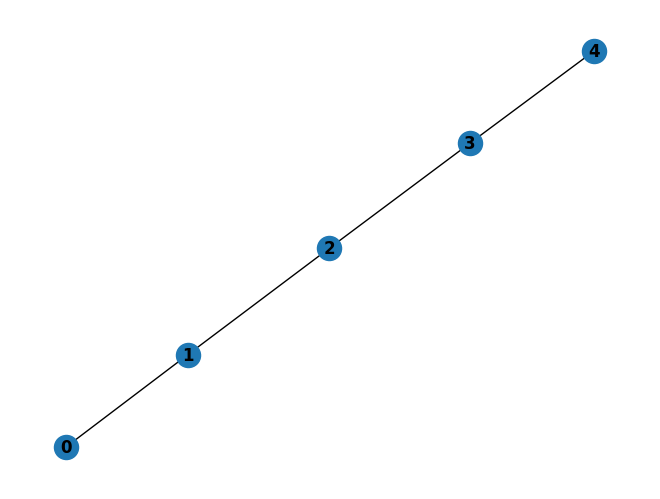

In [2]:
import util
import networkx as nx
from envs import GraphEnv

graph, metadata = util.generate_line(5)
nx.draw(graph, with_labels=True, font_weight="bold")

agent_config = {
    "Impala": {"location": 0},
    "Lion": {"location": 4, "predator": True},
}
object_config = {"Food": 2}

# create environment
env = GraphEnv(graph, agent_config, object_config, forage=True)

## Agents

Now we create both a `ForageAgent` and a `PredatorAgent`.

In [3]:
from agents import ForageAgent, PredatorAgent

agents = [
    ForageAgent(
            "Impala", env, [0], sophisticated=True, planning_horizon=2
        ),
    PredatorAgent("Lion", env, sophisticated=True, planning_horizon=2),
]

## Simulation

We run the simulation for 20 timesteps. The Impala should forage for food and consume it, in order to get its energy levels up. The Lion should catch the Impala instead to keep energized.

In [4]:
from experiment import tick

result = {a: [] for a in agent_config.keys()}

# simulate T timesteps
T = 20
for t in range(T):
    info = tick(agents, env)
    for agent, info in info.items():
        result[info["agent"]].append(info)

Impala moved to location 1
Lion moved to location 3
Impala moved to location 2 and observed object
Lion moved to location 2 and observed object
Object consumed, respawned at location  1
Impala eats
Lion moved to location 2 and observed object
Lion moved to location 2
Impala moved to location 3
Lion moved to location 2
Impala moved to location 4
Impala moved to location 3
Lion moved to location 1
Impala moved to location 2
Lion moved to location 1
Lion moved to location 2
Impala moved to location 1 and observed object
Object consumed, respawned at location  1
Lion moved to location 3
Impala eats
Lion moved to location 3
Impala moved to location 1 and observed object
Object consumed, respawned at location  0
Impala eats
Lion moved to location 3
Lion moved to location 2 and observed object
Impala moved to location 2
Agent consumed
Lion eats
Impala moved to location 3 and observed object
Object consumed, respawned at location  2
Impala eats
Lion moved to location 2
Lion moved to location 1

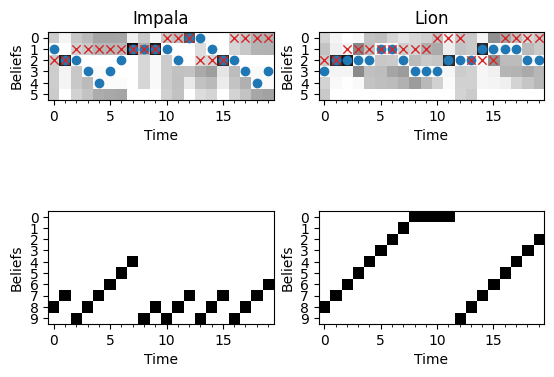

In [5]:
from visualize import *

plot_beliefs(result)